In [1]:
import os, sys
import uproot, awkward
import ROOT as rt
import numpy as np
from array import array
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
import pandas as pd

Welcome to JupyROOT 6.26/02


In [2]:
events_in_this_sim = 50000

In [26]:
dir_ = '.'
inFile_k100 = '%s/GeCrystal_sphericalSource_1M.root'%(dir_)

file_k100 = uproot.open(inFile_k100)
if(not file_k100):
    print("could not open file: %s"%(inFile_k100))
    sys.exit(0)
    
tree = file_k100["Hits"]

if(not tree):
    print("simtree does not exist in file: %s"%(file_k100))
    sys.exit(0)

tree.show()
EV = tree['fEvent'].array(library='np')
KE = tree['fenergy'].array(library='np')
x = tree['fX'].array(library='np')
y = tree['fY'].array(library='np')
z = tree['fZ'].array(library='np')
pid = tree['fPDGID'].array(library='np')
nCap = tree['fnCap'].array(library='np')


df = pd.DataFrame( {'EV' : EV,
                    'KE' : KE,
                    'x' : x,
                    'y' : y,
                    'z' : z,
                    'pid' : pid,
                    'nCap' : nCap}
                 )
df.head(5)

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
fEvent               | int32_t                  | AsDtype('>i4')
fenergy              | double                   | AsDtype('>f8')
fX                   | double                   | AsDtype('>f8')
fY                   | double                   | AsDtype('>f8')
fZ                   | double                   | AsDtype('>f8')
fPDGID               | int32_t                  | AsDtype('>i4')
fnCap                | int32_t                  | AsDtype('>i4')


,EV,KE,x,y,z,pid,nCap
0,10,2.500000e-08,-20.894329,45.424960,-10.329413,2112,0
1,24,2.500000e-08,-43.072457,-0.551142,13.712115,2112,0
2,24,2.465458e-08,-40.545217,1.235514,16.650000,2112,0
3,24,3.131316e-08,-43.072457,-0.551142,13.712115,320730,0
4,24,0.000000e+00,-43.072457,-0.551142,13.712115,320730,0


In [74]:
# pid_map = {
#     70 : 320710,
#     71 : 320720,
#     72 : 320730,
#     73 : 320740,
#     74 : 320750,
#     75 : 320760,
#     76 : 320770
# }

pid_map = {
    320710 : 70,
    320720 : 71,
    320730 : 72,
    320740 : 73,
    320750 : 74,
    320760 : 75,
    320770 : 76
    
}



In [29]:
events = (np.unique(df.EV))

In [31]:
#df.groupby('EV')   
gb = df.groupby('EV')    
#gb.groups
gps = [gb.get_group(x) for x in gb.groups]

In [65]:
isotopes = {
    320710 : 0,
    320720 : 0,
    320730 : 0,
    320740 : 0,
    320750 : 0,
    320760 : 0,
    320770 : 0
}
Nneutron = 0

h_neutron_x_y = rt.TH2F('h_neutron_x_y','h_neutron_x_y',120,-60,60,120,-60,60)
h_neutron_x_y.GetXaxis().SetTitle('x [mm]')
h_neutron_x_y.GetYaxis().SetTitle('y [mm]')

h_neutron_x_z = rt.TH2F('h_neutron_x_z','h_neutron_x_z',120,-60,60,60,-30, 30)
h_neutron_x_z.GetXaxis().SetTitle('x [mm]')
h_neutron_x_z.GetYaxis().SetTitle('z [mm]')

h_neutron_y_z = rt.TH2F('h_neutron_y_z','h_neutron_y_z',120,-60,60,60,-30, 30)
h_neutron_y_z.GetXaxis().SetTitle('y [mm]')
h_neutron_y_z.GetYaxis().SetTitle('z [mm]')

h_ncap_x_y = rt.TH2F('h_ncap_x_y','h_ncap_x_y',120,-60,60,120,-60,60)
h_ncap_x_y.GetXaxis().SetTitle('x [mm]')
h_ncap_x_y.GetYaxis().SetTitle('y [mm]')

h_ncap_x_z = rt.TH2F('h_ncap_x_z','h_ncap_x_z',120,-60,60,60,-30, 30)
h_ncap_x_z.GetXaxis().SetTitle('x [mm]')
h_ncap_x_z.GetYaxis().SetTitle('z [mm]')

h_ncap_y_z = rt.TH2F('h_ncap_y_z','h_ncap_y_z',120,-60,60,60,-30, 30)
h_ncap_y_z.GetXaxis().SetTitle('y [mm]')
h_ncap_y_z.GetYaxis().SetTitle('z [mm]')

for i,df_ in tqdm(enumerate(gps)):
    indices = np.where(df_.pid == 2112)[0]
    if(len(indices) == 0):
        print('No neutron in event %d = '%(i))
        break
    else:
        Nneutron += 1
        index = indices[0]
        x = df_.x.iloc[index]
        y = df_.y.iloc[index]
        z = df_.z.iloc[index]
        h_neutron_x_y.Fill(x, y)
        h_neutron_x_z.Fill(x, z)
        h_neutron_y_z.Fill(y, z)
    indices = np.where(df_.nCap == 1)[0]
    if(len(indices)):        
        index = indices[0]
        pdgid = df_.pid.iloc[index+1]
        isotopes[pdgid] += 1
        x = df_.x.iloc[index+1]
        y = df_.y.iloc[index+1]
        z = df_.z.iloc[index+1]
        h_ncap_x_y.Fill(x, y)
        h_ncap_x_z.Fill(x, z)
        h_ncap_y_z.Fill(y, z)
        

33172it [00:02, 12573.32it/s]
Warning in <TROOT::Append>: Replacing existing TH1: h_neutron_x_y (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_neutron_x_z (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: h_neutron_y_z (Potential memory leak).


In [54]:
isotopes

{320710: 2903,
 320720: 0,
 320730: 1062,
 320740: 5133,
 320750: 813,
 320760: 0,
 320770: 49}

In [57]:
Nneutron

33172

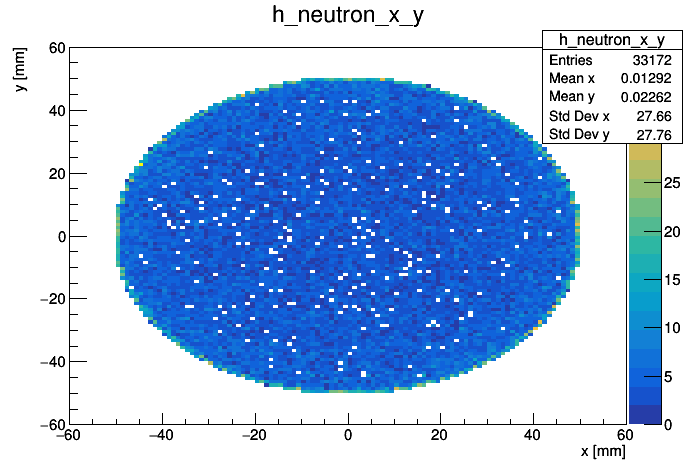

In [56]:
c = rt.TCanvas()
h_neutron_x_y.Draw('colz')
c.Draw()

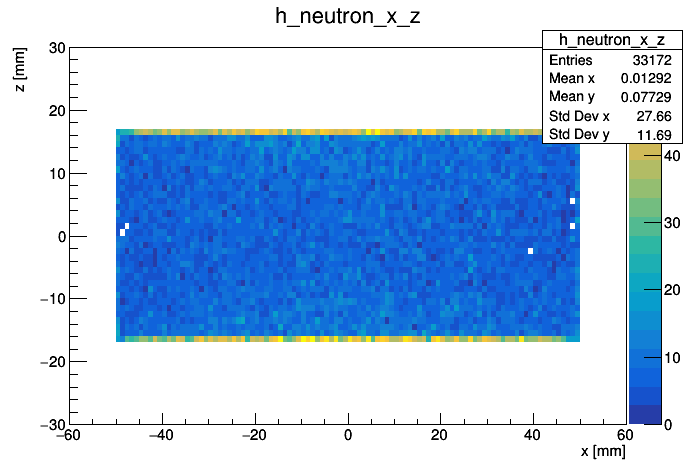

In [58]:
c = rt.TCanvas()
h_neutron_x_z.Draw('colz')
c.Draw()

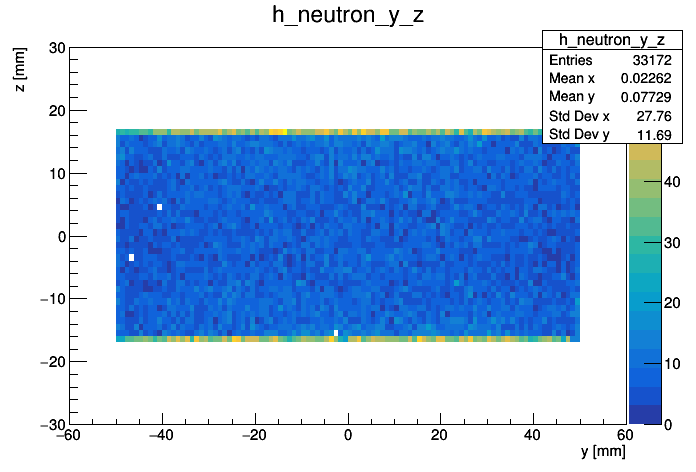

In [64]:
c = rt.TCanvas()
h_neutron_y_z.Draw('colz')
c.Draw()

In [62]:
Nncap = isotopes[320710]
cross_section = (Nncap/Nneutron)*111.59
print('cross-section Ge70 = %0.3f b'%(cross_section))

cross-section Ge70 = 9.766 b


In [63]:
Nncap/Nneutron

0.08751356565778368

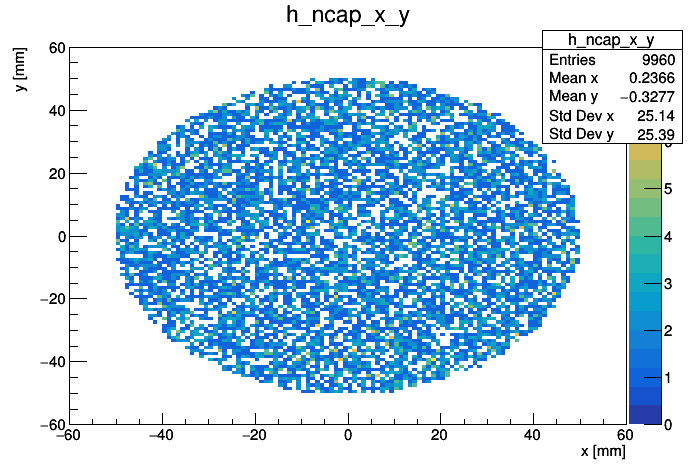

In [66]:
c = rt.TCanvas()
h_ncap_x_y.Draw('colz')
c.Draw()

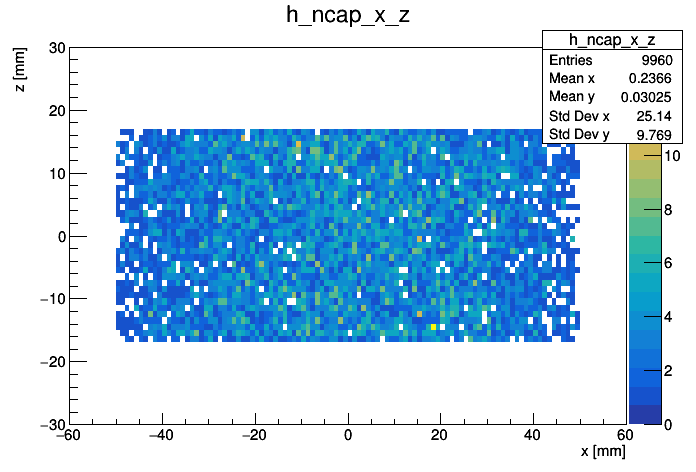

In [67]:
c = rt.TCanvas()
h_ncap_x_z.Draw('colz')
c.Draw()

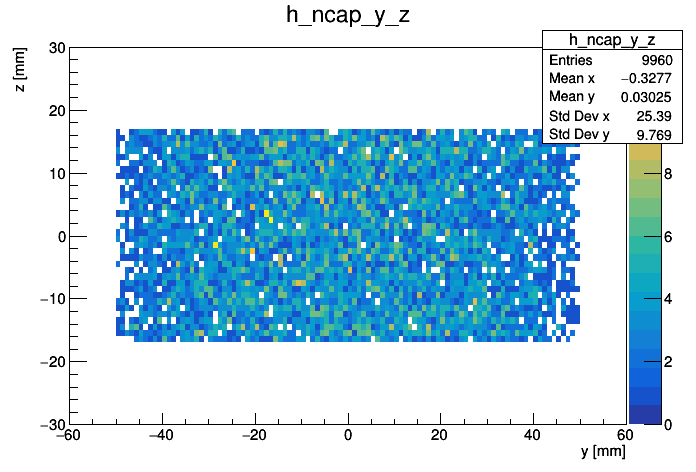

In [68]:
c = rt.TCanvas()
h_ncap_y_z.Draw('colz')
c.Draw()

In [78]:
abundance = {
    70 : 0.205,
    71 : 0,
    72 : 0.2745,
    73 : 0.077,
    74 : 0.365,
    75 : 0,
    76 : 0.075
}

In [83]:
isotopes

{320710: 2903,
 320720: 0,
 320730: 1062,
 320740: 5133,
 320750: 813,
 320760: 0,
 320770: 49}

In [89]:
for key in isotopes.keys():
    Nncap = isotopes[key]
    
    if(abundance[pid_map[key]] > 0):
        cross_section = (Nncap/Nneutron)*111.59*(0.205/abundance[pid_map[key]])
        print('Cross-section for Ge-%d = %0.3f b'%(pid_map[key],cross_section/3.2))

Cross-section for Ge-70 = 3.052 b
Cross-section for Ge-72 = 0.834 b
Cross-section for Ge-73 = 14.366 b
Cross-section for Ge-74 = 0.480 b
Cross-section for Ge-76 = 0.141 b


In [88]:
9.766/3.05

3.201967213114754

In [66]:
((318)/50000)*1105

7.0278

In [24]:
144/218

0.6605504587155964

In [1]:
102.71/8

12.83875